<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/04_MNIST_Basics/Basic_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchtext

In [2]:
#hide
!pip install -Uqq fastbook fastai==2.2.5
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.8MB/s 
     |████████████████████████████████| 194kB 22.0MB/s 
     |████████████████████████████████| 1.2MB 25.1MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 776.8MB 18kB/s 
     |████████████████████████████████| 12.8MB 263kB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [7]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [10]:
array(im3)[4:11,4:11]

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29, 150],
       [  0,   0,   0,  48, 166, 224, 253],
       [  0,  93, 244, 249, 253, 187,  46],
       [  0, 107, 253, 253, 230,  48,   0],
       [  0,   3,  20,  20,  15,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [11]:
tensor(im3)[4:11,4:11]

tensor([[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150],
        [  0,   0,   0,  48, 166, 224, 253],
        [  0,  93, 244, 249, 253, 187,  46],
        [  0, 107, 253, 253, 230,  48,   0],
        [  0,   3,  20,  20,  15,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [12]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [13]:
#See nº of images
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

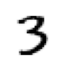

In [14]:
show_image(three_tensors[1]);

In [15]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

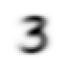

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

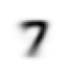

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

In [49]:
is_three_prob = (stacked_threes[40] - mean3).abs().mean()
is_seven_prob = (stacked_threes[40] - mean7).abs().mean()
if is_three_prob < is_seven_prob:
  print("Is three")
else:
  print("Is seven")

Is three


In [48]:
is_three_prob = (stacked_sevens[3] - mean3).abs().mean()
is_seven_prob = (stacked_sevens[3] - mean7).abs().mean()
if is_three_prob < is_seven_prob:
  print("Is three")
else:
  print("Is seven")

Is seven
